# CNN AND VAT COMPARISON IN SVHN DATASET

*by Zheyi Qin,Zihui Li December 12, 2019*

# 1. PROBLEM FORMULATION

For nowadays, image recognition has become one of the most hit fields in machine learning. As we depend more and more on smart electrical devices, vehicles, and family facilities, the accuracy and reliability of these machines become the most significant issue. Recognizing numbers in images can extract the information contents from pictures, thus it will be used in future to realize smart city and IoT world. For example, it can be applied to automatic mail distribution in communities; Handwritten digit recognition can be applied to bank remittance number identification to greatly reduce labor costs. Print identification can be applied to postal code recognition. Natural scene digital recognition are applied to license plate number identification.   
Among these image recognition applications, multi-diigit photographic numbers in captured at street level such as Google Street View consists of millions of geo-located panoramic images. The ability of convert street view digital number to computer recognizable numbers will helps us pinpoint the building locations, increase the accuracy of finding real world store, etc. <sup>[4]</sup>   
More broadly, recognizing photographic street view numbers is related to the optical character recognition technique. The difficulties lies in such problem invloves the wide variability in the visual appearance of numbers, they might have different fonts, colors, styles, intra-digit spaces. The recognition problem is further complicated by environmental factors such as lighting, shadows, it is also affected by photographic issues such as resolution, motion and focus blurs.   
In this project, we mainly focus on single-digit(affected by close neighbor digits) recognition from Street View photos. Due to the above complexities, traditional approaches to solve this problem typically separate out the segmentation, and recognition steps.   


As we already learned in class, convolutional neural network is a deep learning algorithm which can take in an input image, adjust learnable weights and bias to different aspects in the image, thus differentiate one from other, and use softmax technique to classify different categories of images. Also, CNN is able to successfully capture the spatial and temporal dependencies in an image. But CNN can not solve all kinds of recognition and classification problem.    
In fast developing digital world, we human generate terabytes of images every day, most of the images are not labeled, manually classify categories of images cost a lot of energy. 99% of the images are not classified doesn't mean they are meaningless, unclassified images also contain features and information. Thus we need a new machine learning technique to utilize these chaos information and extract useful features from them. 

VAT<sup>[2]</sup> is a regularization method, which introduces additional information in order to manage the inevitable gap between the training error and the test error, it has given good results in supervised learning, semi-supervised learning, and unsupervised clustering. Even without label information, virtual adversarial directions can be defined on unlabeled data points. Then 'virtual' training can be performed on these 'new' datasets. Base on these concepts, the method can be used on semi-supervised learning. That is why we interested in VAT. We only need to teach a model a few things, then it can learn more and more.  
The core in VAT is a method called local distributional smoothness (LDS). The LDS bases on KL-divergence of outputs of original inputs and perturbation outputs of perturbation inputs. The KL-divergence is a kind of loss, and its reduction would make the model smooth at each data point. 

The key steps for virtual adversarial training are:
1. Give an input date point, $x$.
2. Add a small perturbation $r$ to $x$. Thus the transformed data will be $T(x) = x + r$. Note that the perturbation $r$ should be in the adversarial direction.
3. The KL divergence between the model output of perturbed input $T(x)$ and the non-perturbed output should be maximum. From all the perturbations $r$, $r_{v-adv}$ would be the perturbation in the adversarial direction.

$$\Delta_{KL}(r,x^{(n)},\theta) \equiv KL[p(y|x^{(x)}),\theta\parallel p(y|x^{(x)} + r, \theta)]$$

$$r_{v-adv}^{(n)} \equiv \operatorname*{arg\,max}_r\{\Delta_{KL}(r, x^{(n)}, \theta;\|r\|_2) \leq \epsilon\}$$

There are two types of hyperparameters<sup>[2]</sup> in VAT:  
1. The norm constraint $\epsilon$ > 0 for the adversarial direction  
2. The regularization coefficient $\alpha$ > 0 that controls the relative balance between the negative log-likelihood and the regularizer $r_{v-adv}$  
By properly choosing these two hyperparameters, VAT-based model can perform very well. 

In this project, we will apply CNN and VAT-Virtual Adversarial Training network to predict MNIST hand-writing digits and number street views, the MNIST dataset is used to testing keras, sklearn and other python machine learning tools, then make further exploration on SVHN dataset to compare the advantages and disadvantages of these two techniques. 

# 2. METHODOLOGY

Steps:
1. We tried basic CNN model we learned in class. Due to lacking of normalizatition, padding, maxpooling, dropout techniques, the training and prediction results are not ideal, then we choose to use keras tools to build machine learning models both in CNN and VAT.
2. Delete 54800 labels of MNIST and 70257/71257/72257 labels of SVHN dataset, preparing for semi-supervised VAT. 
* Explore keras tool using MNIST dataset, adjust parameters such as kernal size, strides, maxpooling parameters, then apply CNN and VAT techniques based on those to verify if VAT performs better in inadequate-classifed dataset.
3. Using the above training model on SVHN dataset and compare precidtion accuray of CNN and VAT respectively, we tried 4 different set of training data: 1000 labeled, 72257 unlabeled images; 2000 labeled, 71257 unlabeled images; 3000 labeled, 70257 unlabeled images. Note that unlike MNIST dataset, the SVHN dataset comes from the real world images, which has 3 color channels. The color doesn't matter because we only want to recognize digits. Before we put data as input for VAT model, they are converted to greyscale, then substract the mean of each image and divide by its standard deviation. In CNN, we simply add normalization layer to realize the same functionality after we input the data to CNN model.  
4. Discuss about the situations that VAT performs better than CNN and why it is better. Explore the hyperparameters in different models and why these parameters affect our reulsts.

There are mutiple layers in both CNN and VAT network. Two/Three of them are convolutional neural networks with different kernal sieze and strides, and we mainly use relu algorithm as activation because it has lower computational simplicity, it is unlike the tanh and sigmoid activation function that require the use of an exponential calculation and is capable of outputting a true zero value.  

Then we apply local response normalization with different parameters according to the dataset. In neurobiology, there is a concept called “lateral inhibition”. This refers to the capacity of an excited neuron to subdue its neighbors. We basically want a significant peak so that we have a form of local maxima. Local Response Normalization (LRN) layer implements the lateral inhibition in the CNN layers.

$$b_{x,y}^i = \frac{a_{x,y}^i}{(k+\alpha {\sum_{j=max(0,j-n/2)}^{min(N-1,i+n/2)}}(a_{x,y}^j)^2)^\beta}$$
$a_{x,y}^i$ is the activity of a neuron computed by applying kernel $i$ at position $(x,y)$ and then applying the ReLU nonlinearity, the response-normalized activity $b{x,y}^i$ is given by the above expression. The sum runs over $n$ “adjacent” kernel maps at the same spatial position, and N is the total number of kernels in the layer.  

After convolutional and activation layer we also employ the dropout method. Dropout layer will set the output of each hidden neuron to 0 with the probability we set (usually less than 0.5). The 0 output of neurons do not contribute to the forward pass nor the back-propagation part. So every time an input is presented, the neural network samples a different architecture, but all these architectures share weights. This technique reduces complex co-adaptations of neurons since a neuron cannot rely on the presence of particular other neurons. In this way, the model will be forced to learn different features that are useful in conjunction with different random subsets of the other neurons. The dropout layer also has the function of reducing substantial overfitting. It boost the MNIST and SVHN images prediction 5-7% accuracy.     

We use sgd optimizer on MNIST dataset and Adam on SVHN dataset. Adam is very efficient stochastic optimization method, it only requires first-order gradients with little memory requirement. This method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. Adam optimizer has advantages such as the magnitudes of paramete updates doesn't change with rescaling of the gradient, the stationary objectives are not the necessary requirements. Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example x and lable y.$$\theta = \theta - \eta\cdot\nabla_{\theta} J(\theta;x^{(i)};y^{(i)})$$  
Batch gradient descent performs redundant computations for large datasets because it will recompute gradients for similar data entries before each parameter update. SGD has an efficient way to deal with this issue by performing one update at a time. Therefore, as we learned in class, SGD is usually much faster than Adam.

# 3. DATASET & TOOLS

## 3.1 DATASET

In this project, we use the dataset provided by the Google Street View and processed by Stanford University researchers. The dataset is approximately 1 GB in size and formatted in .png and .mat style. It covers a broad range of dataset about various kinds of street house numbers, make it possible and suitable to implement convolutional neural network method to recognize and extract numbers from image<sup>[1]</sup>. The second dataset is MNIST, this dataset is suitable for testing and comparing the performance of CNN and other machine learning algorithms. 

* The street view house numbers dataset (SVHN) (Download Link:http://ufldl.stanford.edu/housenumbers/)   
* MNIST (Download Link: http://yann.lecun.com/exdb/mnist/)

 The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. The images in this dataset are 28×28 pixels. The images size is fixed, as a result, this dataset is easy for us to start to try implementing new models based on new concepts. After we try our concepts on this dataset, we can implement more complex models in other datasets which is more difficult to do classification.

The main dataset we use is called the Street View House Numbers (SVHN) Dataset. This dataset has 73257 digits for training, and 26032 digits for testing. This dataset has two types of format: original images with character level bounding boxes, and MNIST-like 32×32 images centered around a single character. The images in the first type format do not have fixed size, it is difficult for training the model, there are 2 ways to resize them to the same dimensions, padding or cutting. Cutting does not guarantee that the digit will be kept because by cutting the center part of images, the marginal digits will be dropped, and label would change either. If we choose to pad the images, the padded part doesn't contain any real world imformation, such as shades, texture, colors. As a result, we choose the 32*32 images as SVHN dataset. 

The sample images are in the fourth part.

## 3.2 TOOLS

Python 3.7  
Keras 2.2.5/2.3.1 : Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.   
Tensorflow 1.14.0/2.0.0: TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

# 4. CODE and DISCUSSIONS

## 4.1 Libraries

These are the library we used in the program. In our project, we use keras to build our model. We also try another way to implement our model which will be shown below.

In [122]:
%matplotlib inline
import struct
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import * 
from keras.layers import *
from keras.utils import plot_model
from sklearn.metrics import accuracy_score
import random
import copy
import pandas as pd

These are the versions of tools we use for this program.

In [17]:
print(f'tensorflow:{tf.__version__}')
print(f'keras:{keras.__version__}')
print(f'numpy:{np.version.version}')

tensorflow:1.14.0
keras:2.2.5
numpy:1.17.4


## 4.2 Implementation

### CNN on MNIST

This function can read training dataset, return 32×32 pixels images and labels. Originally, the labels are represented in 1-9, we will transform the labels to one-hot encoding.

In [18]:
def readfile_train():
    with open(r'MNIST_data/train-images-idx3-ubyte','rb') as f:
        train_image = f.read()
    with open(r'MNIST_data/train-labels-idx1-ubyte', 'rb') as f:
        train_labels = f.read()
    return train_image,train_labels

This function prepare the testing dataset, which is similar to training dataset.

In [19]:
def readfile_test():
    with open(r'MNIST_data/t10k-images-idx3-ubyte','rb') as f:
        train_image = f.read()
    with open(r'MNIST_data/t10k-labels-idx1-ubyte', 'rb') as f:
        train_labels = f.read()
    return train_image,train_labels

Read n images in the training/testing datasets.

In [20]:
def get_images(buf,n):
    im=[]
    index = struct.calcsize('>IIII')
    for i in range(n):
        temp = struct.unpack_from('>784B', buf, index)
        im.append(np.reshape(temp, (28, 28)))
        index += struct.calcsize('>784B')
    return np.array(im)

Read n labels in the training/testing datasets.

In [21]:
def get_labels(buf,n):
    l=[]
    index = struct.calcsize('>II')
    for i in range(n):
        temp = struct.unpack_from('>1B', buf, index)
        l.append(temp[0])
        index += struct.calcsize('>1B')
    return np.array(l)

We use all 55000 images in the training dataset as training data, all 10000 images in the testing dataset as testing data. We also normalize the pixel representation from 0-255 to 0-1. The format for model input is (image_index, row, column, channel).

In [22]:
image,label=readfile_train()
train_img=get_images(image,60000)/255.0
train_label=get_labels(label,60000)
image_t,label_t=readfile_train()
test_img=get_images(image_t,10000)/255.0
test_label=get_labels(label_t,10000)
Y_train_cat = keras.utils.to_categorical(train_label)
Y_test_cat = keras.utils.to_categorical(test_label)

train_img784=train_img.reshape(-1,28,28,1)
test_img784=test_img.reshape(-1,28,28,1)
del image,label,image_t,label_t

This is our Convolutional Neural Network (CNN) model for MNIST dataset. It is implemented by two convolutional layers and two full connection layers. The activation functions of all layers except the last layer are ReLU.

In [23]:
def mnist_cnn(input_shape):
    model_full=keras.Sequential()
    #conv 1
    model_full.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                                  padding = 'same',activation = tf.nn.relu,input_shape = input_shape))
    model_full.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    #conv 2
    model_full.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),
                                       padding = 'same',activation = tf.nn.relu))
    model_full.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    model_full.add(keras.layers.Dropout(0.25))
    model_full.add(keras.layers.Flatten())
    #fc
    model_full.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
    model_full.add(keras.layers.Dropout(0.5))
    #softmax
    model_full.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))
    return model_full

Then we create our model and use adam optimizer to compile our model.   
First, we test our CNN model on MNIST dataset where all training data are labeled.  
The accuracy on testing dataset and loss during the training are recorded for plot.

In [24]:
model_cnn_mnist_full_acc_trace=[]
model_cnn_mnist_full_loss_trace=[]
model_cnn_mnist_full=mnist_cnn((28,28,1))
model_cnn_mnist_full.compile('adam',loss="categorical_crossentropy",metrics=['accuracy'])
for i in range(15):
    model_cnn_mnist_full.fit(train_img784 ,Y_train_cat,epochs=1)
    y_pred  = model_cnn_mnist_full.predict( test_img784 ).argmax(-1)
    acc=accuracy_score(test_label , y_pred)
    print(f"epoch:{i}, accruracy in testing dataset(full labeled): {acc}")
    model_cnn_mnist_full_acc_trace.append(acc)
    model_cnn_mnist_full_loss_trace.append(model_cnn_mnist_full.history.history['loss'][-1])
#del model_cnn_mnist_full

Epoch 1/1
60000/60000 [==============================] - 34s 573us/step - loss: 0.1932 - acc: 0.9401
epoch:0, accruracy in testing dataset(full labeled): 0.9862
Epoch 1/1
60000/60000 [==============================] - 34s 565us/step - loss: 0.0766 - acc: 0.9773
epoch:1, accruracy in testing dataset(full labeled): 0.9907
Epoch 1/1
60000/60000 [==============================] - 33s 555us/step - loss: 0.0590 - acc: 0.9826
epoch:2, accruracy in testing dataset(full labeled): 0.993
Epoch 1/1
60000/60000 [==============================] - 34s 563us/step - loss: 0.0494 - acc: 0.9849
epoch:3, accruracy in testing dataset(full labeled): 0.9945
Epoch 1/1
60000/60000 [==============================] - 34s 562us/step - loss: 0.0417 - acc: 0.9871
epoch:4, accruracy in testing dataset(full labeled): 0.9942
Epoch 1/1
60000/60000 [==============================] - 34s 565us/step - loss: 0.0379 - acc: 0.9885
epoch:5, accruracy in testing dataset(full labeled): 0.9957
Epoch 1/1
60000/60000 [============

Then we try training the same CNN model but only use 200 labeled MNIST data.  

Before we train our model, we have to shuffle the dataset and select the first 200 images as labeled data.

In [25]:
permutation = np.random.permutation(train_img784.shape[0])
train_img784 = train_img784[permutation, :, :, :]
Y_train_cat = Y_train_cat[permutation,:]

In [26]:
model_cnn_mnist_200_acc_trace=[]
model_cnn_mnist_200_loss_trace=[]
model_cnn_mnist_200=mnist_cnn((28,28,1))
model_cnn_mnist_200.compile('adam',loss="categorical_crossentropy",metrics=['accuracy'])
for i in range(50):
    model_cnn_mnist_200.fit(train_img784[0:200,:],Y_train_cat[0:200,:] ,epochs=1)
    y_pred  =model_cnn_mnist_200.predict(test_img784).argmax(-1)
    acc=accuracy_score(test_label , y_pred)
    print(f"epoch:{i}, accruracy in testing dataset(200 labeled): {acc}")
    model_cnn_mnist_200_acc_trace.append(acc)
    model_cnn_mnist_200_loss_trace.append(model_cnn_mnist_200.history.history['loss'][-1])
#del model_cnn_mnist_200

Epoch 1/1
200/200 [==============================] - 1s 3ms/step - loss: 2.2765 - acc: 0.1550
epoch:0, accruracy in testing dataset(200 labeled): 0.2263
Epoch 1/1
200/200 [==============================] - 0s 565us/step - loss: 2.1064 - acc: 0.3050
epoch:1, accruracy in testing dataset(200 labeled): 0.3567
Epoch 1/1
200/200 [==============================] - 0s 639us/step - loss: 1.8173 - acc: 0.4250
epoch:2, accruracy in testing dataset(200 labeled): 0.6024
Epoch 1/1
200/200 [==============================] - 0s 606us/step - loss: 1.4769 - acc: 0.5850
epoch:3, accruracy in testing dataset(200 labeled): 0.6632
Epoch 1/1
200/200 [==============================] - 0s 600us/step - loss: 1.2496 - acc: 0.6050
epoch:4, accruracy in testing dataset(200 labeled): 0.6984
Epoch 1/1
200/200 [==============================] - 0s 605us/step - loss: 1.0465 - acc: 0.6450
epoch:5, accruracy in testing dataset(200 labeled): 0.6857
Epoch 1/1
200/200 [==============================] - 0s 727us/step - los

### VAT on MNIST

The accuracy shows that using CNN on semi-supervised learning is not good. We implement a model using VAT which is talked in [2].

For easily calculating the adversarial perturbation, the model input shape is changed to (28×28,), the CNN model used in this VAT model is the same as the model used in M3.1.

In [27]:
train_img7784=train_img.reshape(-1,784)
test_img7784=test_img.reshape(-1,784)
train_img7784 = train_img7784[permutation, :]
del train_img,test_img

This is a function used to calculate Kullback-Leibler divergence (relative entropy).

In [28]:
def kl_divergence(p_logit, q_logit):#KL divergence
    p = tf.nn.softmax(p_logit)
    q = tf.nn.softmax(q_logit)
    return tf.reduce_sum(p*(tf.log(p + 1e-16) - tf.log(q + 1e-16)), axis=1)
def unit_norm(x):
    return x/(tf.reshape(tf.sqrt(tf.reduce_sum(tf.pow(x, 2.0), axis=1)), [-1, 1]) + 1e-16)

Then we build our VAT model.

In [29]:
def vat_mnist_full(epsilon=10,alpha=0.3):
    network = Sequential()
    input_s=(784,)
    network.add(keras.layers.Reshape((28,28,1),input_shape = (784,)))
    network.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),padding = 'same',activation = tf.nn.relu))
    network.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    network.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
    network.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    network.add(keras.layers.Dropout(0.25))
    network.add(keras.layers.Flatten())
    network.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
    network.add(keras.layers.Dropout(0.5))
    network.add(keras.layers.Dense(units=10))

    model_input = Input(input_s)
    p_logit = network( model_input )
    p = Activation('softmax')(p_logit)
    r_adv = tf.random_normal(shape=tf.shape(model_input))
    r_adv = unit_norm(r_adv)
    p_logit_r = network(model_input+epsilon*r_adv)
    kld = tf.reduce_mean(kl_divergence(p_logit,p_logit_r))
    grad_kld = tf.gradients(kld,[r_adv])[0]
    r_vadv = tf.stop_gradient(grad_kld)
    r_vadv = unit_norm(r_vadv)*alpha
    p_logit_no_gradient = tf.stop_gradient(p_logit)
    p_logit_r_adv = network(model_input+r_vadv)
    vat_loss = tf.reduce_mean(kl_divergence(p_logit_no_gradient,p_logit_r_adv))
    model_vat = Model(model_input,p)
    model_vat.add_loss(vat_loss)
    model_vat.compile('sgd','categorical_crossentropy',metrics=['accuracy'])
    model_vat.metrics_names.append('VAT_loss')
    model_vat.metrics_tensors.append(vat_loss)
    return model_vat

We use SGD optimizer to compile our model.  
First, we test our VAT model on MNIST dataset where all training data are labeled.  
The accuracy on testing dataset and loss (include total loss and VAT loss) during the training are recorded for plot.

In [30]:
model_vat_mnist_full_acc_trace=[]
model_vat_mnist_full_loss_trace=[]
model_vat_mnist_full_vatloss_trace=[]
model_vat_mnist_full=vat_mnist_full(epsilon=10,alpha=0.3)
for i in range(50):
    model_vat_mnist_full.fit(train_img7784,Y_train_cat,epochs=1)
    y_pred  =model_vat_mnist_full.predict(test_img7784).argmax(-1)
    acc=accuracy_score(test_label,y_pred)
    print(f"epoch:{i}, accruracy in testing dataset(full labeled): {acc}")
    model_vat_mnist_full_acc_trace.append(acc)
    model_vat_mnist_full_loss_trace.append(model_vat_mnist_full.history.history['loss'][-1])
    model_vat_mnist_full_vatloss_trace.append(model_vat_mnist_full.history.history['VAT_loss'][-1])
#del model_vat_mnist_full

Epoch 1/1
60000/60000 [==============================] - 77s 1ms/step - loss: 1.0318 - acc: 0.7763 - VAT_loss: 0.2450
epoch:0, accruracy in testing dataset(full labeled): 0.9488
Epoch 1/1
60000/60000 [==============================] - 77s 1ms/step - loss: 0.4429 - acc: 0.9394 - VAT_loss: 0.1944
epoch:1, accruracy in testing dataset(full labeled): 0.9663
Epoch 1/1
60000/60000 [==============================] - 75s 1ms/step - loss: 0.3390 - acc: 0.9561 - VAT_loss: 0.1576
epoch:2, accruracy in testing dataset(full labeled): 0.9755
Epoch 1/1
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2844 - acc: 0.9645 - VAT_loss: 0.1382
epoch:3, accruracy in testing dataset(full labeled): 0.9782
Epoch 1/1
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2530 - acc: 0.9696 - VAT_loss: 0.1254
epoch:4, accruracy in testing dataset(full labeled): 0.9808
Epoch 1/1
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2312 - acc: 0.9720 - VAT_loss:

Then we want to know the VAT based model performance when only using 200 labeled MNIST data.  
For this purpose, we modify our model. The model inputs are changed to 
(200 unlabeled images, 200 labeled images, 200 labels of the labeled images).

Before implementing our model, we have to define some function to calculate cross entropy and entropy which are talked about in [2].

In [31]:
def ce_loss(logit, y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))
def logsoftmax(x):
    xdev = x - tf.reduce_max(x, 1, keepdims=True)
    lsm = xdev - tf.log(tf.reduce_sum(tf.exp(xdev), 1, keepdims=True))
    return lsm
def entropy_y_x(logit):
    p = tf.nn.softmax(logit)
    return -tf.reduce_mean(tf.reduce_sum(p * logsoftmax(logit), 1))

In [32]:
def vat_mnist_200(epsilon=1,alpha=0.3):
    network_200 = Sequential()
    input_shape_200=(784,)
    network_200.add(keras.layers.Reshape((28,28,1),input_shape = input_shape_200))
    network_200.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                                  padding = 'same',activation = tf.nn.relu))
    network_200.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    network_200.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
    network_200.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
    network_200.add(keras.layers.Dropout(0.25))
    network_200.add(keras.layers.Flatten())
    network_200.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
    network_200.add(keras.layers.Dropout(0.5))
    network_200.add(keras.layers.Dense(units=10))

    model_input_200_unlabeled = Input((784,))
    model_input_200labels=Input((10,))
    model_input_200_labeled=Input((784,))

    p_logit_200 = network_200(model_input_200_unlabeled)
    p_200 = Activation('softmax')(p_logit_200)
    logit = network_200(model_input_200_labeled)
    nll_loss = ce_loss(logit, model_input_200labels)
    ul_logit = network_200(model_input_200_unlabeled)
    r_200 = tf.random_normal(shape=tf.shape(model_input_200_unlabeled))
    r_200 = unit_norm(r_200)
    p_logit_r_200 = network_200(model_input_200_unlabeled+epsilon*r_200)
    kld_200 = tf.reduce_mean(kl_divergence(p_logit_200,p_logit_r_200))
    grad_kld_200 = tf.gradients(kld_200,[r_200])[0]
    r_vadv_200 = tf.stop_gradient(grad_kld_200)
    r_vadv_200 = unit_norm(r_vadv_200)*alpha
    p_logit_no_gradient_200 = tf.stop_gradient(p_logit_200)
    p_logit_r_adv_200 = network_200(model_input_200_unlabeled+r_vadv_200)
    vat_loss =  tf.reduce_mean(kl_divergence(p_logit_no_gradient_200,p_logit_r_adv_200))
    ent_loss = entropy_y_x(ul_logit)
    additional_loss = vat_loss + ent_loss
    loss_f = nll_loss + additional_loss
    model_vat_200 = Model([model_input_200_unlabeled,model_input_200_labeled,model_input_200labels],p_200)
    model_vat_200.add_loss(loss_f)
    model_vat_200.compile( 'sgd',None,metrics=['accuracy'])
    model_vat_200.metrics_names.append('total_loss')
    model_vat_200.metrics_tensors.append(loss_f)
    return model_vat_200

We use SGD optimizer to compile our model.  
We test our VAT model on MNIST dataset where only 200 training data are labeled.  
The accuracy on testing dataset and total loss during the training are recorded for plot.

Since our model has three inputs (n unlabeled images,n labeled images, n labels of the labeled images), when we use our model for prediction, we have to give it an useless label as the third input. This label does not influence the prediction.

In [33]:
test_label_useless=np.array([9]*len(test_label))
test_label_useless = keras.utils.to_categorical(test_label_useless)

In [34]:
model_vat_mnist_200_acc_trace=[]
model_vat_mnist_200_loss_trace=[]
model_vat_mnist_200=vat_mnist_200(epsilon=10,alpha=0.33)
for j in range(3):
    for i in range(200,59800,200):
        model_vat_mnist_200.fit([train_img7784[i:i+200,:],train_img7784[0:200,:],Y_train_cat[0:200,:]],None ,epochs=1)
        y_pred  =model_vat_mnist_200.predict([test_img7784,test_img7784,test_label_useless]).argmax(-1)
        acc=accuracy_score(test_label , y_pred)
        print(f"epoch:{i//200}, accruracy in testing dataset(200 labeled): {acc}")
        model_vat_mnist_200_acc_trace.append(acc)
        model_vat_mnist_200_loss_trace.append(model_vat_mnist_200.history.history['total_loss'][-1])
#del model_vat_mnist_200

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch 1/1
200/200 [==============================] - 1s 6ms/step - loss: 4.6147 - total_loss: 4.6147
epoch:1, accruracy in testing dataset(200 labeled): 0.119
Epoch 1/1
200/200 [==============================] - 0s 2ms/step - loss: 4.6045 - total_loss: 4.6045
epoch:2, accruracy in testing dataset(200 labeled): 0.1329
Epoch 1/1
200/200 [==============================] - 0s 2ms/step - loss: 4.5977 - total_loss: 4.5977
epoch:3, accruracy in testing dataset(200 labeled): 0.137
Epoch 1/1
200/200 [==============================] - 0s 2ms/step - loss: 4.5684 - total_loss: 4.5684
epoch:4, accruracy in testing dataset(200 labeled): 0.1571
Epoch 1/1
200/200 [==============================] - 0s 2ms/step - loss: 4.5569 - total_loss: 4.5569
epoch:5, accruracy in testing dataset(200 labeled): 0.1585
Epoch 1/1
2

In [35]:
del train_img7784,test_img7784,Y_train_cat,test_label,y_pred

### SVHN prediction using CNN with 3000 labeled data

In [85]:
# reimport to keep everything works 
import numpy as np
import torch
import time
import copy
import sys
import keras
from keras.models import * 
from keras.layers import *
from keras.utils import plot_model
from sklearn.metrics import accuracy_score
import tensorflow
torch.set_default_tensor_type('torch.DoubleTensor')

In [86]:
# build model for CNN on SVHN
def build_model():
    input_shape = (32,32,3)
    
    cnn_model=keras.Sequential()
    # conv layer 1

    cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size = 3,strides = (1,1),
                                  padding = 'same',activation = tensorflow.nn.relu,input_shape = input_shape))
    cnn_model.add(keras.layers.BatchNormalization())
    cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (1,1), padding = 'valid'))
    cnn_model.add(keras.layers.Dropout(0.3))
    # conv layer 2
    cnn_model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),
                                      padding = 'same',activation = tensorflow.nn.relu))
    cnn_model.add(keras.layers.BatchNormalization())
    cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (1,1), padding = 'valid'))
    cnn_model.add(keras.layers.Dropout(0.3))
    # conv layer 3
    cnn_model.add(keras.layers.Conv2D(filters=128,kernel_size = 3,strides = (1,1),
                                      padding = 'same',activation = tensorflow.nn.relu))
    cnn_model.add(keras.layers.MaxPool2D(pool_size=(2,2),padding = 'valid'))
    
    cnn_model.add(keras.layers.Dropout(0.5))
    
    cnn_model.add(keras.layers.Flatten())
    cnn_model.add(keras.layers.Dense(units=1024,activation = tensorflow.nn.relu))
    cnn_model.add(keras.layers.Dense(units=512,activation = tensorflow.nn.relu))
    #cnn_model.add(keras.layers.Dropout(0.5))
    cnn_model.add(keras.layers.Dense(units=11,activation = tensorflow.nn.softmax))
    
    return cnn_model

After adjusting hyperparameters multiple times, we found 3 CNN layers, each one with kernal size as 3, stride 1 works best for SVHN dataset, reLu as activation method, and set dropout ratio as 0.3.

In [87]:
# reimport data if needed
import numpy as np
import matplotlib.pyplot as plt
import pickle, gzip
import scipy.io as sio
import random

In [25]:
# Load the dataset, 
# take first ---3000--- labeled data samples for training
train_contents = sio.loadmat('train_32_32.mat')
test_contents = sio.loadmat('test_32_32.mat')
Xtrain_3000 = train_contents['X'][:,:,:,0:3000].astype('float32')
Ttrain_3000 = train_contents['y'][0:3000].astype('float32')
Xtest_3000 = test_contents['X'].astype('float32')
Ttest_3000 = test_contents['y'].astype('float32')
Xtrain_3000.shape

(32, 32, 3, 3000)

In [26]:
Xtrain_3000 = Xtrain_3000.transpose((3,0,1,2))
Xtest_3000 = Xtest_3000.transpose((3,0,1,2))

Xtrain_3000 = np.array(Xtrain_3000)
Ttrain_3000 = np.array(Ttrain_3000)
Xtest_3000 = np.array(Xtest_3000)
Ttest_3000 = np.array(Ttest_3000)

In [27]:
Ttrain_3000 = Ttrain_3000.flatten()
Ttest_3000 = Ttest_3000.flatten()
Ttest_3000 = keras.utils.to_categorical(Ttest_3000)
Ttrain_3000 = keras.utils.to_categorical(Ttrain_3000)

In [28]:
cnn_model_3000label = build_model()
cnn_model_3000label.compile(optimizer=tensorflow.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])


In [29]:
cnn_model_3000label.fit(Xtrain_3000, Ttrain_3000, batch_size=64, epochs=15)

Epoch 1/15
3000/3000 [==============================] - 22s 7ms/step - loss: 9.3752 - accuracy: 0.1547
Epoch 2/15
3000/3000 [==============================] - 21s 7ms/step - loss: 2.2677 - accuracy: 0.2000
Epoch 3/15
3000/3000 [==============================] - 22s 7ms/step - loss: 2.2121 - accuracy: 0.2037
Epoch 4/15
3000/3000 [==============================] - 22s 7ms/step - loss: 2.0563 - accuracy: 0.2633
Epoch 5/15
3000/3000 [==============================] - 22s 7ms/step - loss: 1.7065 - accuracy: 0.4143
Epoch 6/15
3000/3000 [==============================] - 22s 7ms/step - loss: 1.3145 - accuracy: 0.5660
Epoch 7/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.9280 - accuracy: 0.6950
Epoch 8/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.7068 - accuracy: 0.7630
Epoch 9/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.5111 - accuracy: 0.8303
Epoch 10/15
3000/3000 [==============================] - 22s 7ms/step - l

In [30]:
loss_3000label, accuracy_3000label = cnn_model_3000label.evaluate(Xtest_3000, Ttest_3000, batch_size=64)

26032/26032 [==============================] - 49s 2ms/step


In [33]:
print('loss:%.4f accuracy:%.4f' %(loss_3000label, accuracy_3000label))

loss:1.6298 accuracy:0.7056


In the above experiment we use 3000 labeled data samples to train CNN model, then test the classification prediction of 26032 testing images. The result would fluctuate a little bit if we do experiment multiple times.  
With CNN, using 3000 labeled images to predict 26032 images attain 70%~74% accuray.

### SVHN prediction using CNN with 2000 labeled data

In [88]:
# before start, import library and build_model() again if needed

# Load the dataset, 
# take first ---2000--- labeled data samples for training
train_contents = sio.loadmat('train_32_32.mat')
test_contents = sio.loadmat('test_32_32.mat')
Xtrain_2000 = train_contents['X'][:,:,:,0:2000].astype('float32')
Ttrain_2000 = train_contents['y'][0:2000].astype('float32')
Xtest_2000 = test_contents['X'].astype('float32')
Ttest_2000 = test_contents['y'].astype('float32')
Xtrain_2000.shape

(32, 32, 3, 2000)

In [89]:
Xtrain_2000 = Xtrain_2000.transpose((3,0,1,2))
Xtest_2000 = Xtest_2000.transpose((3,0,1,2))

Xtrain_2000 = np.array(Xtrain_2000)
Ttrain_2000 = np.array(Ttrain_2000)
Xtest_2000 = np.array(Xtest_2000)
Ttest_2000 = np.array(Ttest_2000)

In [90]:
Ttrain_2000 = Ttrain_2000.flatten()
Ttest_2000 = Ttest_2000.flatten()
Ttest_2000 = keras.utils.to_categorical(Ttest_2000)
Ttrain_2000 = keras.utils.to_categorical(Ttrain_2000)

In [40]:
cnn_model_2000label = build_model()
cnn_model_2000label.compile(optimizer=tensorflow.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])

In [41]:
cnn_model_2000label.fit(Xtrain_2000, Ttrain_2000, batch_size=64, epochs=19)

Epoch 1/19
2000/2000 [==============================] - 15s 8ms/step - loss: 14.9439 - accuracy: 0.1665
Epoch 2/19
2000/2000 [==============================] - 15s 7ms/step - loss: 2.2914 - accuracy: 0.1945
Epoch 3/19
2000/2000 [==============================] - 15s 8ms/step - loss: 2.2168 - accuracy: 0.2255
Epoch 4/19
2000/2000 [==============================] - 15s 8ms/step - loss: 2.0824 - accuracy: 0.2880
Epoch 5/19
2000/2000 [==============================] - 16s 8ms/step - loss: 1.8217 - accuracy: 0.3690
Epoch 6/19
2000/2000 [==============================] - 15s 8ms/step - loss: 1.4161 - accuracy: 0.5165
Epoch 7/19
2000/2000 [==============================] - 15s 7ms/step - loss: 1.0877 - accuracy: 0.6415
Epoch 8/19
2000/2000 [==============================] - 15s 8ms/step - loss: 0.8197 - accuracy: 0.7235
Epoch 9/19
2000/2000 [==============================] - 16s 8ms/step - loss: 0.6410 - accuracy: 0.7890
Epoch 10/19
2000/2000 [==============================] - 15s 8ms/step - 

In [44]:
loss_2000label, accuracy_2000label = cnn_model_2000label.evaluate(Xtest_2000, Ttest_2000, batch_size=64)

26032/26032 [==============================] - 49s 2ms/step


In [45]:
print('loss:%.4f accuracy:%.4f' %(loss_2000label, accuracy_2000label))

loss:3.8115 accuracy:0.5602


In [91]:
cnn_model_2000label_acc = []
for i in range(30):
    cnn_model_2000label = build_model()
    cnn_model_2000label.compile(optimizer=tensorflow.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
    cnn_model_2000label.fit(Xtrain_2000, Ttrain_2000, batch_size=64, epochs=i)
    loss_2000label, accuracy_2000label = cnn_model_2000label.evaluate(Xtest_2000, Ttest_2000, batch_size=64)
    cnn_model_2000label_acc.append(accuracy_2000label)


26032/26032 [==============================] - 47s 2ms/step
Epoch 1/1
26032/26032 [==============================] - 47s 2ms/step
Epoch 1/2
2000/2000 [==============================] - 15s 8ms/step - loss: 9.8954 - accuracy: 0.1565
Epoch 2/2
26032/26032 [==============================] - 47s 2ms/step
Epoch 1/3
2000/2000 [==============================] - 16s 8ms/step - loss: 12.0349 - accuracy: 0.1390
Epoch 2/3
2000/2000 [==============================] - 15s 7ms/step - loss: 2.2992 - accuracy: 0.2090
Epoch 3/3
26032/26032 [==============================] - 48s 2ms/step
Epoch 1/4
2000/2000 [==============================] - 15s 7ms/step - loss: 12.3505 - accuracy: 0.1115
Epoch 2/4
2000/2000 [==============================] - 14s 7ms/step - loss: 2.2834 - accuracy: 0.2125
Epoch 3/4
2000/2000 [==============================] - 14s 7ms/step - loss: 2.2059 - accuracy: 0.2115
Epoch 4/4
26032/26032 [==============================] - 47s 2ms/step
Epoch 1/5
2000/2000 [=========================

2000/2000 [==============================] - 14s 7ms/step - loss: 0.2280 - accuracy: 0.9245
Epoch 14/17
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2263 - accuracy: 0.9250
Epoch 15/17
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1760 - accuracy: 0.9450
Epoch 16/17
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1801 - accuracy: 0.9505
Epoch 17/17
26032/26032 [==============================] - 48s 2ms/step
Epoch 1/18
2000/2000 [==============================] - 16s 8ms/step - loss: 12.0327 - accuracy: 0.1245
Epoch 2/18
2000/2000 [==============================] - 15s 7ms/step - loss: 2.3024 - accuracy: 0.1880
Epoch 3/18
2000/2000 [==============================] - 15s 7ms/step - loss: 2.2231 - accuracy: 0.2070
Epoch 4/18
2000/2000 [==============================] - 15s 7ms/step - loss: 2.0943 - accuracy: 0.2590
Epoch 5/18
2000/2000 [==============================] - 15s 7ms/step - loss: 1.7566 - accuracy: 0.4105
Epoch 6/

2000/2000 [==============================] - 15s 8ms/step - loss: 11.2341 - accuracy: 0.1115
Epoch 2/25
2000/2000 [==============================] - 14s 7ms/step - loss: 2.2769 - accuracy: 0.1905
Epoch 3/25
2000/2000 [==============================] - 15s 7ms/step - loss: 2.1211 - accuracy: 0.2670
Epoch 4/25
2000/2000 [==============================] - 15s 7ms/step - loss: 1.7750 - accuracy: 0.4020
Epoch 5/25
2000/2000 [==============================] - 14s 7ms/step - loss: 1.3984 - accuracy: 0.5300
Epoch 6/25
2000/2000 [==============================] - 14s 7ms/step - loss: 1.0594 - accuracy: 0.6530
Epoch 7/25
2000/2000 [==============================] - 16s 8ms/step - loss: 0.7855 - accuracy: 0.7400
Epoch 8/25
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5704 - accuracy: 0.8055
Epoch 9/25
2000/2000 [==============================] - 15s 8ms/step - loss: 0.4141 - accuracy: 0.8710
Epoch 10/25
2000/2000 [==============================] - 14s 7ms/step - loss: 0.353

26032/26032 [==============================] - 50s 2ms/step
Epoch 1/28
2000/2000 [==============================] - 16s 8ms/step - loss: 12.3049 - accuracy: 0.1125
Epoch 2/28
2000/2000 [==============================] - 14s 7ms/step - loss: 2.3103 - accuracy: 0.1955
Epoch 3/28
2000/2000 [==============================] - 17s 9ms/step - loss: 2.2066 - accuracy: 0.2215
Epoch 4/28
2000/2000 [==============================] - 16s 8ms/step - loss: 1.9759 - accuracy: 0.3340
Epoch 5/28
2000/2000 [==============================] - 16s 8ms/step - loss: 1.6049 - accuracy: 0.4715
Epoch 6/28
2000/2000 [==============================] - 16s 8ms/step - loss: 1.1926 - accuracy: 0.5945
Epoch 7/28
2000/2000 [==============================] - 15s 8ms/step - loss: 0.9103 - accuracy: 0.7030
Epoch 8/28
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6700 - accuracy: 0.7740
Epoch 9/28
2000/2000 [==============================] - 15s 7ms/step - loss: 0.5012 - accuracy: 0.8355
Epoch 10/28


The less we use labeled data for training in CNN, the lower accuracy we get. Also, we will need more epoches to train networks. The predction result on testing dataset would fluctuate between 56% ~ 64%, depending on which training data subset we pick and different training process.

### SVHN prediction using CNN with 1000 labeled data

In [80]:
# before start, import library and build_model() again if needed

# Load the dataset, 
# take first ---1000--- labeled data samples for training
train_contents = sio.loadmat('train_32_32.mat')
test_contents = sio.loadmat('test_32_32.mat')
Xtrain_1000 = train_contents['X'][:,:,:,0:1000].astype('float32')
Ttrain_1000 = train_contents['y'][0:1000].astype('float32')
Xtest_1000 = test_contents['X'].astype('float32')
Ttest_1000 = test_contents['y'].astype('float32')
Xtrain_1000.shape

(32, 32, 3, 1000)

In [81]:
Xtrain_1000 = Xtrain_1000.transpose((3,0,1,2))
Xtest_1000 = Xtest_1000.transpose((3,0,1,2))

Xtrain_1000 = np.array(Xtrain_1000)
Ttrain_1000 = np.array(Ttrain_1000)
Xtest_1000 = np.array(Xtest_1000)
Ttest_1000 = np.array(Ttest_1000)

In [82]:
Ttrain_1000 = Ttrain_1000.flatten()
Ttest_1000 = Ttest_1000.flatten()
Ttest_1000 = keras.utils.to_categorical(Ttest_1000)
Ttrain_1000 = keras.utils.to_categorical(Ttrain_1000)

In [83]:
cnn_model_1000label_acc = []
for i in range(30):
    cnn_model_1000label = build_model()
    cnn_model_1000label.compile(optimizer=tensorflow.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
    cnn_model_1000label.fit(Xtrain_1000, Ttrain_1000, batch_size=64, epochs=i)
    loss_1000label, accuracy_1000label = cnn_model_1000label.evaluate(Xtest_1000, Ttest_1000, batch_size=64)
    cnn_model_1000label_acc.append(accuracy_1000label)

26032/26032 [==============================] - 48s 2ms/step
Epoch 1/1
26032/26032 [==============================] - 49s 2ms/step
Epoch 1/2
1000/1000 [==============================] - 9s 9ms/step - loss: 25.2384 - accuracy: 0.1410
Epoch 2/2
26032/26032 [==============================] - 48s 2ms/step
Epoch 1/3
1000/1000 [==============================] - 8s 8ms/step - loss: 29.3957 - accuracy: 0.0890
Epoch 2/3
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3935 - accuracy: 0.1730
Epoch 3/3
26032/26032 [==============================] - 49s 2ms/step
Epoch 1/4
1000/1000 [==============================] - 8s 8ms/step - loss: 20.0334 - accuracy: 0.1270
Epoch 2/4
1000/1000 [==============================] - 7s 7ms/step - loss: 2.3789 - accuracy: 0.2020
Epoch 3/4
1000/1000 [==============================] - 7s 7ms/step - loss: 2.3208 - accuracy: 0.2060
Epoch 4/4
26032/26032 [==============================] - 48s 2ms/step
Epoch 1/5
1000/1000 [==============================

1000/1000 [==============================] - 7s 7ms/step - loss: 0.2327 - accuracy: 0.9240
Epoch 16/17
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1737 - accuracy: 0.9490
Epoch 17/17
26032/26032 [==============================] - 47s 2ms/step
Epoch 1/18
1000/1000 [==============================] - 8s 8ms/step - loss: 29.8642 - accuracy: 0.0980
Epoch 2/18
1000/1000 [==============================] - 7s 7ms/step - loss: 2.3920 - accuracy: 0.1680
Epoch 3/18
1000/1000 [==============================] - 7s 7ms/step - loss: 2.3267 - accuracy: 0.2070
Epoch 4/18
1000/1000 [==============================] - 7s 7ms/step - loss: 2.2608 - accuracy: 0.2050
Epoch 5/18
1000/1000 [==============================] - 7s 7ms/step - loss: 2.1906 - accuracy: 0.2190
Epoch 6/18
1000/1000 [==============================] - 7s 7ms/step - loss: 2.0725 - accuracy: 0.2710
Epoch 7/18
1000/1000 [==============================] - 7s 7ms/step - loss: 1.8762 - accuracy: 0.3520
Epoch 8/18
1000/100

1000/1000 [==============================] - 7s 7ms/step - loss: 2.2266 - accuracy: 0.2120
Epoch 6/25
1000/1000 [==============================] - 7s 7ms/step - loss: 2.1659 - accuracy: 0.2320
Epoch 7/25
1000/1000 [==============================] - 7s 7ms/step - loss: 2.0310 - accuracy: 0.3240
Epoch 8/25
1000/1000 [==============================] - 7s 7ms/step - loss: 1.7452 - accuracy: 0.3950
Epoch 9/25
1000/1000 [==============================] - 7s 7ms/step - loss: 1.5122 - accuracy: 0.4910
Epoch 10/25
1000/1000 [==============================] - 8s 8ms/step - loss: 1.0992 - accuracy: 0.6240
Epoch 11/25
1000/1000 [==============================] - 8s 8ms/step - loss: 0.8372 - accuracy: 0.7130
Epoch 12/25
1000/1000 [==============================] - 8s 8ms/step - loss: 0.6869 - accuracy: 0.7680
Epoch 13/25
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4839 - accuracy: 0.8300
Epoch 14/25
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3481 - acc

In [84]:
cnn_model_1000label_acc

[0.06830055266618729,
 0.06165488809347153,
 0.17513060569763184,
 0.16214658319950104,
 0.1958358883857727,
 0.19587430357933044,
 0.207360178232193,
 0.2803472578525543,
 0.19633528590202332,
 0.1415565460920334,
 0.48221421241760254,
 0.45248156785964966,
 0.36904579401016235,
 0.2985556125640869,
 0.3261754810810089,
 0.43242931365966797,
 0.40546250343322754,
 0.47526121139526367,
 0.45267364382743835,
 0.5115242600440979,
 0.49170252680778503,
 0.4972725808620453,
 0.48958972096443176,
 0.4532114267349243,
 0.4998847544193268,
 0.5391057133674622,
 0.328403502702713,
 0.43938228487968445,
 0.44798707962036133,
 0.47825753688812256]

In [51]:
cnn_model_1000label = build_model()
cnn_model_1000label.compile(optimizer=tensorflow.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
cnn_model_1000label.fit(Xtrain_1000, Ttrain_1000, batch_size=64, epochs=23)

Epoch 1/23
1000/1000 [==============================] - 8s 8ms/step - loss: 31.2884 - accuracy: 0.1100
Epoch 2/23
1000/1000 [==============================] - 7s 7ms/step - loss: 2.3975 - accuracy: 0.2020
Epoch 3/23
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3366 - accuracy: 0.2080
Epoch 4/23
1000/1000 [==============================] - 8s 8ms/step - loss: 2.2658 - accuracy: 0.2060
Epoch 5/23
1000/1000 [==============================] - 8s 8ms/step - loss: 2.2108 - accuracy: 0.2120
Epoch 6/23
1000/1000 [==============================] - 7s 7ms/step - loss: 2.1506 - accuracy: 0.2400
Epoch 7/23
1000/1000 [==============================] - 8s 8ms/step - loss: 2.0480 - accuracy: 0.2860
Epoch 8/23
1000/1000 [==============================] - 8s 8ms/step - loss: 1.8376 - accuracy: 0.3490
Epoch 9/23
1000/1000 [==============================] - 8s 8ms/step - loss: 1.5735 - accuracy: 0.4560
Epoch 10/23
1000/1000 [==============================] - 8s 8ms/step - loss: 1.32

In [54]:
loss_1000label, accuracy_1000label = cnn_model_1000label.evaluate(Xtest_1000, Ttest_1000, batch_size=64)

26032/26032 [==============================] - 48s 2ms/step


In [55]:
print('loss:%.4f accuracy:%.4f' %(loss_1000label, accuracy_1000label))

loss:2.4710 accuracy:0.5326


In this experiment, we only use 1000 labeled data samples to train CNN, during the training process, the adjustment of weights does not guarantee every epoch will increase the performance of training. For instance, in the second, third, fourth epoch, the loss value doesn't go down at all, which shows that 1000 sample is far from adequate to train an comprehensive convolutional network. From the prediction result we can also find the accuracy is very low, it fluctuate between 49%~54% depending on different training process and traning test samples we use.

In real world, we encounter this kind of issue very often. Although most of the datasets have inadequate labeled data, most of them have unlabeled data samples, and we could use these unlabeled data to boost prediction accuracy by using semi-supervised learning algorithms.

In the next part, we'll implement VAT algorithm and explore if VAT can actually solve inadequate labeled data issue.

### VAT on SVHN

After testing our concepts of building VAT based models, we want to try building more complex model on a more difficult dataset. We choose SVHN dataset[1]. This dataset use label 10 for number 0, and there is no label 0 in the dataset, which is strange. As a result, we change label 10 to label 0. 

In [36]:
from scipy.io import loadmat
svhn_train=loadmat('train_32x32.mat')
svhn_test=loadmat('test_32x32.mat')
svhn_train_img3072=svhn_train['X'][:,:,:,:].transpose((3,0,1,2))
svhn_test_img3072=svhn_test['X'][:,:,:,:].transpose((3,0,1,2))
svhn_train_label=svhn_train['y'][:,0]
svhn_test_label=svhn_test['y'][:,0]
svhn_train_label[svhn_train_label== 10] = 0#change label 10 to label 0
svhn_test_label[svhn_test_label == 10] = 0
svhn_test_label_onehot=keras.utils.to_categorical(svhn_test_label)
svhn_train_label_onehot=keras.utils.to_categorical(svhn_train_label)

At present, label 0-9 represent number 0-9. After reading the dataset, the data format is (image_index, row, column, channel).  
Using RGB images to train the model is too slow, as a resutl, we use the method in [3] to convert RGB images to grayscale images. Now these images only have 1 channel which is faster for training the model. We also do standardization on the grayscale images.

In [37]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.3, 0.59, 0.11]), axis=3)

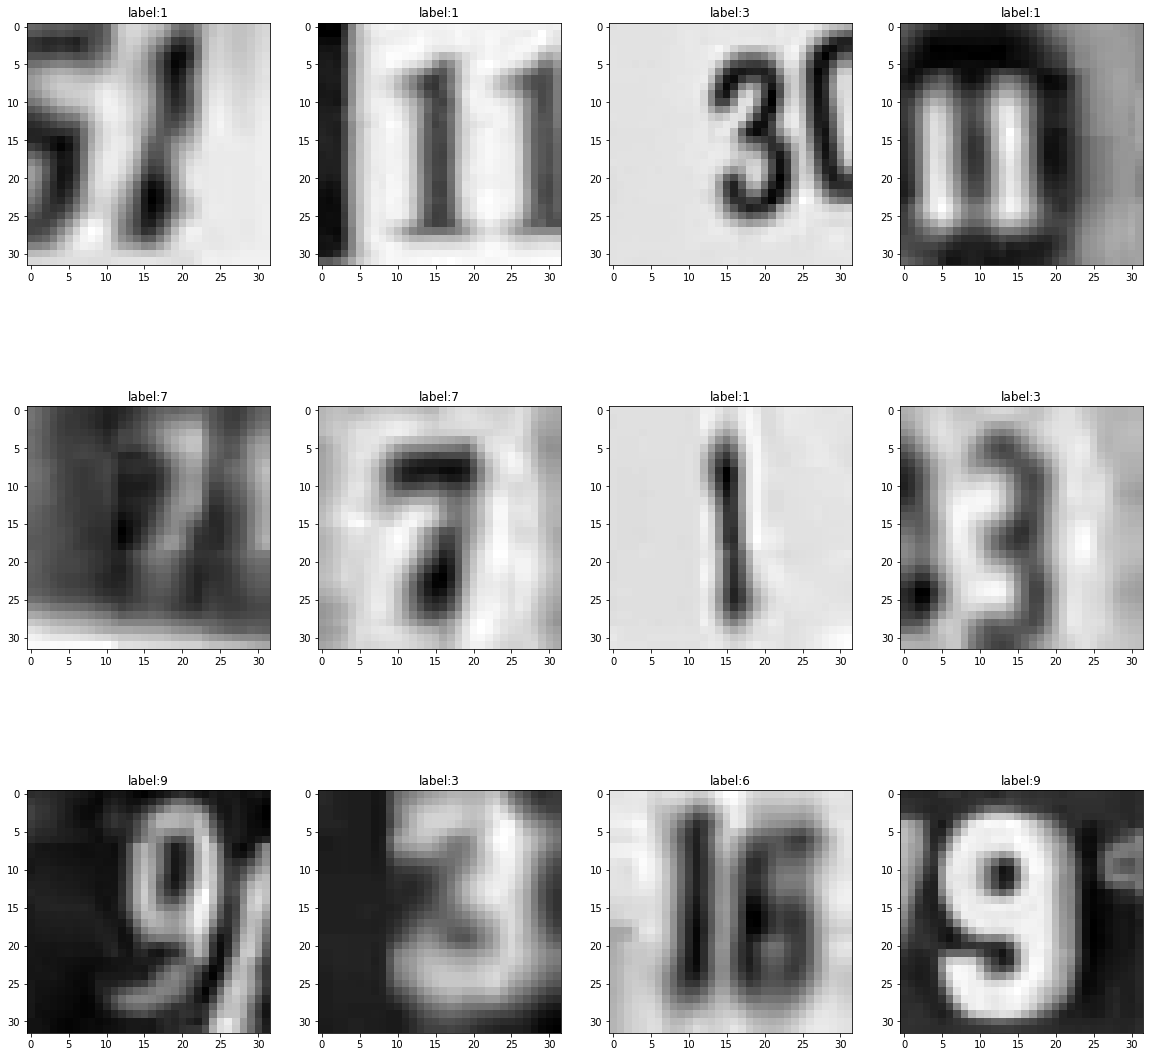

In [38]:
train_greyscale = rgb2gray(svhn_train_img3072).astype(np.float32).reshape(-1,1024)
test_greyscale = rgb2gray(svhn_test_img3072).astype(np.float32).reshape(-1,1024)

for i in range(12):
    plt.figure(0,figsize=(20,20))
    rffwp=random.randint(0,len(test_greyscale)-1)
    plt.subplot(3,4,i+1)
    plt.imshow(test_greyscale[rffwp].reshape(32,32),cmap ='gray')
    plt.title(f'label:{svhn_test_label[rffwp]}')

train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale = (train_greyscale - train_mean) / train_std
test_greyscale = (test_greyscale - train_mean)  / train_std

Similar to what we do in M3.2, we shuffle the dataset and use the first 3000 images in training dataset as labeled data.

In [39]:
permutation = np.random.permutation(train_greyscale.shape[0])
train_greyscale = train_greyscale[permutation, :]
svhn_train_label = svhn_train_label[permutation]
svhn_train_label_onehot = svhn_train_label_onehot[permutation,:]
train_greyscale_3000label=train_greyscale[0:3000]
svhn_train_label_onehot_3000label=svhn_train_label_onehot[0:3000]

After we prepare the training dataset and testing dataset, we implement our VAT based model for SVHN dataset.

In [40]:
def vat_svhn_1(epsilon=1,alpha=0.3):
    network_svhn = Sequential()
    input_shape_svhn=(1024,)
    network_svhn.add(keras.layers.Reshape((32,32,1),input_shape = input_shape_svhn))
    network_svhn.add(keras.layers.Conv2D(filters=32,kernel_size = [5,5],padding = 'same',activation = tf.nn.relu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
    network_svhn.add(keras.layers.Conv2D(filters=64,kernel_size = [5,5],padding = 'same',activation = tf.nn.relu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides =2))
    network_svhn.add(keras.layers.Dropout(0.25))
    network_svhn.add(keras.layers.Reshape((-1, 8 * 8 * 64)))
    #network_svhn.add(keras.layers.Dropout(0.25))
    #network_svhn.add(keras.layers.Flatten())
    network_svhn.add(keras.layers.Dense(units=256,activation = tf.nn.relu))
    #network_svhn.add(keras.layers.Dropout(0.5))
    network_svhn.add(keras.layers.Dense(units=10))

    model_input_n_unlabeled = Input((1024,))
    model_input_nlabels=Input((10,))
    model_input_n_labeled=Input((1024,))

    p_logit_svhn = network_svhn( model_input_n_unlabeled )
    p_svhn = Activation('softmax')( p_logit_svhn )
    logit_svhn = network_svhn(model_input_n_labeled)
    _svhn = Activation('softmax')( logit_svhn )
    nll_loss_svhn = ce_loss(logit_svhn, model_input_nlabels)
    ul_logit_svhn = network_svhn(model_input_n_unlabeled)
    r_svhn = tf.random_normal(shape=tf.shape( model_input_n_unlabeled ))
    r_svhn = unit_norm( r_svhn )
    p_logit_r_svhn = network_svhn( model_input_n_unlabeled + epsilon*r_svhn  )
    kld_svhn = tf.reduce_mean(kl_divergence( p_logit_svhn , p_logit_r_svhn ))
    grad_kld_svhn = tf.gradients( kld_svhn , [r_svhn])[0]
    r_vadv_svhn = tf.stop_gradient(grad_kld_svhn)
    r_vadv_svhn = unit_norm( r_vadv_svhn )*alpha
    p_logit_no_gradient_svhn = tf.stop_gradient(p_logit_svhn)
    logit_no_gradient_svhn=tf.stop_gradient(logit_svhn)
    p_logit_r_adv_svhn = network_svhn( model_input_n_unlabeled + r_vadv_svhn )
    p_logit_r_adv_svhn_2 = network_svhn( model_input_n_labeled+ r_vadv_svhn )
    vat_loss_svhn =  tf.reduce_mean(kl_divergence( p_logit_no_gradient_svhn, p_logit_r_adv_svhn ))
    vat_loss_svhn_2=tf.reduce_mean(kl_divergence( _svhn, model_input_nlabels))
    ent_loss_svhn = entropy_y_x(ul_logit_svhn)
    additional_loss_svhn = vat_loss_svhn + ent_loss_svhn+vat_loss_svhn_2
    loss_f_svhn = nll_loss_svhn + additional_loss_svhn
    model_vat_svhn = Model([model_input_n_unlabeled,model_input_n_labeled,model_input_nlabels], p_svhn )
    model_vat_svhn.add_loss(loss_f_svhn)
    model_vat_svhn.compile( 'sgd',None,metrics=['accuracy'])
    model_vat_svhn.metrics_names.append('total_loss_svhn')
    model_vat_svhn.metrics_tensors.append(loss_f_svhn )
    return model_vat_svhn

Since our model has three inputs (n unlabeled images,n labeled images, n labels of the labeled images), when we use our model for prediction, we have to give it an useless label as the third input. This label does not influence the prediction.

In [41]:
svhn_test_label_onehot_useless=keras.utils.to_categorical([9]*len(svhn_test_label_onehot))

In [42]:
model_vat_svhn_3000_acc_trace=[]
model_vat_svhn_3000_loss_trace=[]
model_vat_svhn_3000=vat_svhn_1(epsilon=10,alpha=0.3)
for j in range(3):
    for i in range(3000,70256,3000):
        model_vat_svhn_3000.fit([train_greyscale[i:i+3000],train_greyscale_3000label,svhn_train_label_onehot_3000label], None,epochs=1 )
        y_pred_svhn = model_vat_svhn_3000.predict( [test_greyscale,test_greyscale,svhn_test_label_onehot_useless] ).argmax(-1)
        acc=accuracy_score(svhn_test_label , y_pred_svhn)
        print(f"epoch:{i//3000}, accruracy in testing dataset(3000 labeled): {acc}")
        model_vat_svhn_3000_acc_trace.append(acc)
        model_vat_svhn_3000_loss_trace.append(model_vat_svhn_3000.history.history['total_loss_svhn'][-1])
#del model_vat_svhn_3000

Epoch 1/1
3000/3000 [==============================] - 12s 4ms/step - loss: 2.4303 - total_loss_svhn: 2.4303
epoch:1, accruracy in testing dataset(3000 labeled): 0.19656576521204672
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3956 - total_loss_svhn: 2.3956
epoch:2, accruracy in testing dataset(3000 labeled): 0.20905039950829749
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3612 - total_loss_svhn: 2.3612
epoch:3, accruracy in testing dataset(3000 labeled): 0.19741087891825446
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.2915 - total_loss_svhn: 2.2915
epoch:4, accruracy in testing dataset(3000 labeled): 0.2694376152427781
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.1701 - total_loss_svhn: 2.1701
epoch:5, accruracy in testing dataset(3000 labeled): 0.43319760295021514
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 1.9649 - total_

In [43]:
del train_greyscale_3000label,svhn_train_label_onehot_3000label
train_greyscale_2000label=train_greyscale[0:2000]
svhn_train_label_onehot_2000label=svhn_train_label_onehot[0:2000]

In [44]:
model_vat_svhn_2000_acc_trace=[]
model_vat_svhn_2000_loss_trace=[]
model_vat_svhn_2000=vat_svhn_1(epsilon=10,alpha=0.3)
for j in range(3):
    for i in range(2000,71256,2000):
        model_vat_svhn_2000.fit([train_greyscale[i:i+2000],train_greyscale_2000label,svhn_train_label_onehot_2000label], None,epochs=1 )
        y_pred_svhn = model_vat_svhn_2000.predict( [test_greyscale,test_greyscale,svhn_test_label_onehot_useless] ).argmax(-1)
        acc=accuracy_score(svhn_test_label , y_pred_svhn)
        print(f"epoch:{i//2000}, accruracy in testing dataset(2000 labeled): {acc}")
        model_vat_svhn_2000_acc_trace.append(acc)
        model_vat_svhn_2000_loss_trace.append(model_vat_svhn_2000.history.history['total_loss_svhn'][-1])
#del model_vat_svhn_2000

Epoch 1/1
2000/2000 [==============================] - 8s 4ms/step - loss: 2.4494 - total_loss_svhn: 2.4494
epoch:1, accruracy in testing dataset(2000 labeled): 0.20666871542716655
Epoch 1/1
2000/2000 [==============================] - 7s 3ms/step - loss: 2.4129 - total_loss_svhn: 2.4129
epoch:2, accruracy in testing dataset(2000 labeled): 0.22249539028887522
Epoch 1/1
2000/2000 [==============================] - 7s 4ms/step - loss: 2.3929 - total_loss_svhn: 2.3929
epoch:3, accruracy in testing dataset(2000 labeled): 0.22464658881376767
Epoch 1/1
2000/2000 [==============================] - 7s 3ms/step - loss: 2.3673 - total_loss_svhn: 2.3673
epoch:4, accruracy in testing dataset(2000 labeled): 0.2381684081130916
Epoch 1/1
2000/2000 [==============================] - 7s 4ms/step - loss: 2.3283 - total_loss_svhn: 2.3283
epoch:5, accruracy in testing dataset(2000 labeled): 0.24489090350338044
Epoch 1/1
2000/2000 [==============================] - 7s 3ms/step - loss: 2.2785 - total_loss_s

In [45]:
del train_greyscale_2000label,svhn_train_label_onehot_2000label
train_greyscale_1000label=train_greyscale[0:1000]
svhn_train_label_onehot_1000label=svhn_train_label_onehot[0:1000]

In [46]:
model_vat_svhn_1000_acc_trace=[]
model_vat_svhn_1000_loss_trace=[]
model_vat_svhn_1000=vat_svhn_1(epsilon=10,alpha=1)
for j in range(3):
    for i in range(1000,72256,1000):
        model_vat_svhn_1000.fit([train_greyscale[i:i+1000],train_greyscale_1000label,svhn_train_label_onehot_1000label], None,epochs=1 )
        y_pred_svhn = model_vat_svhn_1000.predict( [test_greyscale,test_greyscale,svhn_test_label_onehot_useless] ).argmax(-1)
        acc=accuracy_score(svhn_test_label , y_pred_svhn)
        print(f"epoch:{i//1000}, accruracy in testing dataset(1000 labeled): {acc}")
        model_vat_svhn_1000_acc_trace.append(acc)
        model_vat_svhn_1000_loss_trace.append(model_vat_svhn_1000.history.history['total_loss_svhn'][-1])
#del model_vat_svhn_1000

Epoch 1/1
1000/1000 [==============================] - 5s 5ms/step - loss: 2.4635 - total_loss_svhn: 2.4635
epoch:1, accruracy in testing dataset(1000 labeled): 0.18942071296865395
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 2.4270 - total_loss_svhn: 2.4270
epoch:2, accruracy in testing dataset(1000 labeled): 0.19114935464044253
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 2.4141 - total_loss_svhn: 2.4141
epoch:3, accruracy in testing dataset(1000 labeled): 0.1951060233558697
Epoch 1/1
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3990 - total_loss_svhn: 2.3990
epoch:4, accruracy in testing dataset(1000 labeled): 0.19794867854947756
Epoch 1/1
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3900 - total_loss_svhn: 2.3900
epoch:5, accruracy in testing dataset(1000 labeled): 0.19145666871542716
Epoch 1/1
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3702 - total_loss_s

### Comparison between our VAT performance and authoritative sources

After trying that, we are confused because the accuracy of VAT-based model in 200 labeled MNIST data can only reach 93%. We want to explore the limit of VAT. We want to know whether our VAT-based model is good enough. In order to explore the reasons why there is a difference between our experiments and authoritative sources, we use another program collected from github.

Before using these codes, we change the number of labeled data in online program. We use 240 labeled data in online program (where in our model we use 200 labeled data).

In [47]:
#NOTE: codes in this cell are collected from online resource
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy

from model import VATModel, SemiSupervisedVATModel

__author__ = 'Romain Tavenard romain.tavenard[at]univ-rennes2.fr'

n_filters = 5
kernel_size = 5
pool_size = 2
n_classes = 10

model = Sequential([
    Convolution2D(n_filters,
                  kernel_size,
                  activation='relu',
                  input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation="relu"),
    Dense(n_classes, activation='softmax')
])

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')[:, :, :, None]
X_test = X_test.astype('float32')[:, :, :, None]
X_train /= 255.
X_test /= 255.

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# # Fully supervised training: do not use VATModel
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])
# Semi-supervised training: define a model with two inputs/outputs/losses, one
# for supervised data, one for unsupervised data
indices_supervised = numpy.random.randint(low=0, high=X_train.shape[0],
                                          size=X_train.shape[0] // 300)#we change size here
indices_unsupervised = numpy.isin(numpy.arange(X_train.shape[0]),
                                  indices_supervised,
                                  invert=True)

X_train_sup = X_train[indices_supervised]
y_train_sup = y_train[indices_supervised]
X_train_unsup = X_train[indices_unsupervised]

#we print shapes of labeled and unlabeled data
print(f'labeled data:{X_train_sup.shape}\n\
label:{y_train_sup.shape}\n\
unlabeled data:{X_train_unsup.shape}')

model3 = SemiSupervisedVATModel(model=model)
model3.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy"])
for i in range(10):
    model3.fit([X_train_sup, X_train_unsup],
               [y_train_sup, None],
               batch_size=128, epochs=5)
    print(model3.evaluate(X_test, y_test))

labeled data:(200, 28, 28, 1)
label:(200, 10)
unlabeled data:(59800, 28, 28, 1)
epoch 1/5: sup_loss: 2.6832541232446023 sup_acc: 0.147048982869379 unsup_loss: 1.6496170908970806e-05 
epoch 2/5: sup_loss: 4.705180652646998 sup_acc: 0.12372858672376874 unsup_loss: 0.0001703039551058054 
epoch 3/5: sup_loss: 6.096926467576935 sup_acc: 0.20001338329764454 unsup_loss: 0.0063674367143003755 
epoch 4/5: sup_loss: 1.7049837243250656 sup_acc: 0.6603653640256959 unsup_loss: 0.013867899823367467 
epoch 5/5: sup_loss: 0.4253772716386926 sup_acc: 0.853001204496788 unsup_loss: 0.0071618772997786104 
10000/10000 [==============================] - 1s 141us/step
[1.433732829761505, 0.6443]
epoch 1/5: sup_loss: 0.3038772919576224 sup_acc: 0.9022851980728052 unsup_loss: 0.007884932496949902 
epoch 2/5: sup_loss: 0.2197537413405402 sup_acc: 0.935241568522484 unsup_loss: 0.008420286076921147 
epoch 3/5: sup_loss: 0.18846991120556436 sup_acc: 0.9423347162740899 unsup_loss: 0.01307891381703062 
epoch 4/5: su

The results show that the online resource model can only reach 84% accuracy while our model reach 92% accuracy. We only reach a slightly higher accuracy on MNIST dataset.  
Then we are curious whether our VAT-based model can outperform online resource model in a more complex dataset-SVHN.  
We also try modifying their model and try this new model on SVHN dataset and compare the results with our our model's results.

Below is a network model which is the same as the network model used in our VAT-based model. We try replace the original network model in the online codes with this network.

In [98]:
def net_svhn_model():
    network_svhn = Sequential()
    network_svhn.add(keras.layers.Conv2D(filters=32,kernel_size = [5,5],
                                  padding = 'valid',activation = tf.nn.relu,input_shape = (32,32,1)))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
    network_svhn.add(keras.layers.Conv2D(filters=64,kernel_size = [5,5],padding = 'valid',activation = tf.nn.relu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides =2))
    #network_svhn.add(keras.layers.Dropout(0.25))
    network_svhn.add(keras.layers.Flatten())
    #network_svhn.add(keras.layers.Reshape((-1, 8 * 8 * 64)))
    network_svhn.add(keras.layers.Dense(units=256,activation = tf.nn.relu))
    #network_svhn.add(keras.layers.Dense(units=10,activation=tf.nn.relu))
    network_svhn.add(keras.layers.Dense(units=10,activation=tf.nn.softmax))
    return network_svhn

We also have to prepare SVNH dataset for the online resource model. We change the SVHN dataset format to the format online resource model need.

In [49]:
from scipy.io import loadmat
svhn_train=loadmat('train_32x32.mat')
svhn_test=loadmat('test_32x32.mat')

svhn_train_img3072=svhn_train['X'][:,:,:,:].transpose((3,0,1,2))
svhn_test_img3072=svhn_test['X'][:,:,:,:].transpose((3,0,1,2))
svhn_train_label=svhn_train['y'][:,0]
svhn_test_label=svhn_test['y'][:,0]
svhn_train_label[svhn_train_label== 10] = 0#change label 10 to label 0
svhn_test_label[svhn_test_label == 10] = 0
svhn_test_label_onehot=keras.utils.to_categorical(svhn_test_label)
svhn_train_label_onehot=keras.utils.to_categorical(svhn_train_label)
del svhn_train,svhn_test

train_greyscale = rgb2gray(svhn_train_img3072).astype(np.float32)
test_greyscale = rgb2gray(svhn_test_img3072).astype(np.float32)

del svhn_train_img3072,svhn_test_img3072

Use new network model and train the online resource model on SVHN dataset.

In [99]:
#NOTE: codes in this cell are collected from online resource, and are modified by us
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy

from model import VATModel, SemiSupervisedVATModel

__author__ = 'Romain Tavenard romain.tavenard[at]univ-rennes2.fr'

model=net_svhn_model()

X_train=train_greyscale.reshape(-1,32,32)
X_test=test_greyscale.reshape(-1,32,32)
X_train = X_train.astype('float32')[:, :, :, None]
X_test = X_test.astype('float32')[:, :, :, None]
X_train /= 255.
X_test /= 255.

# convert class vectors to binary class matrices
y_train=to_categorical(svhn_train_label)
y_test=to_categorical(svhn_test_label)

# # Fully supervised training: do not use VATModel
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

# Semi-supervised training: define a model with two inputs/outputs/losses, one
# for supervised data, one for unsupervised data
indices_supervised = numpy.random.randint(low=0, high=X_train.shape[0],
                                          size=X_train.shape[0] // 24)
indices_unsupervised = numpy.isin(numpy.arange(X_train.shape[0]),
                                  indices_supervised,
                                  invert=True)
X_train=X_train[permutation]
y_train=y_train[permutation]
#X_train_sup = X_train[indices_supervised]
#y_train_sup = y_train[indices_supervised]
#X_train_unsup = X_train[indices_unsupervised]
X_train_sup=X_train[0:3000]
y_train_sup = y_train[0:3000]
X_train_unsup = X_train[3000:]

#we print shapes of labeled and unlabeled data
print(f'labeled data:{X_train_sup.shape}\n\
label:{y_train_sup.shape}\n\
unlabeled data:{X_train_unsup.shape}')

model3 = SemiSupervisedVATModel(model=model,input_shape=(32, 32, 1))
model3.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy"])
for i in range(10):
    model3.fit([X_train_sup, X_train_unsup],
               [y_train_sup, None],
               batch_size=128, epochs=5)
    print(model3.evaluate(X_test, y_test))

labeled data:(3000, 32, 32, 1)
label:(3000, 10)
unlabeled data:(70257, 32, 32, 1)
epoch 1/5: sup_loss: 2.25038704906937 sup_acc: 0.1897810218978102 unsup_loss: 1.1630813343689747e-06 
epoch 2/5: sup_loss: 2.236257762804519 sup_acc: 0.1936730155109489 unsup_loss: 4.6689201196617764e-08 
epoch 3/5: sup_loss: 2.234832114111768 sup_acc: 0.19626767791970803 unsup_loss: 3.916680197423524e-08 
epoch 4/5: sup_loss: 2.2351362970623656 sup_acc: 0.1930314781021898 unsup_loss: 2.844939584502073e-07 
epoch 5/5: sup_loss: 2.2409115002973237 sup_acc: 0.19395814324817517 unsup_loss: 2.2394773846224927e-07 
26032/26032 [==============================] - 8s 300us/step
[2.2245704789211507, 0.1958743085433313]
epoch 1/5: sup_loss: 2.2333236454177077 sup_acc: 0.19300296532846714 unsup_loss: 2.473634096910824e-07 
epoch 2/5: sup_loss: 2.2306421120671462 sup_acc: 0.19750798357664234 unsup_loss: 1.0439130487856493e-06 
epoch 3/5: sup_loss: 2.2283523052278227 sup_acc: 0.19873403284671534 unsup_loss: 2.43866754

We notice that something strange happened. The model cannot learn. We guess the reason could be something related to the activation function ReLU. As a result, we try another activation function LeakyReLU.

In [100]:
def net_svhn_model_with_lrelu():
    network_svhn = Sequential()
    lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)
    network_svhn.add(keras.layers.Conv2D(filters=32,kernel_size = [5,5],
                                  padding = 'valid',activation = lrelu,input_shape = (32,32,1)))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
    network_svhn.add(keras.layers.Conv2D(filters=64,kernel_size = [5,5],padding = 'valid',activation = lrelu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides =2))
    network_svhn.add(keras.layers.Flatten())
    #network_svhn.add(keras.layers.Reshape((-1, 8 * 8 * 64)))
    network_svhn.add(keras.layers.Dense(units=256,activation = lrelu))
    #network_svhn.add(keras.layers.Dense(units=10,activation=tf.nn.relu))
    network_svhn.add(keras.layers.Dense(units=10,activation=tf.nn.softmax))
    return network_svhn

In [102]:
#NOTE: codes in this cell are collected from online resource, and are modified by us
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy

from model import VATModel, SemiSupervisedVATModel

__author__ = 'Romain Tavenard romain.tavenard[at]univ-rennes2.fr'

model=net_svhn_model_with_lrelu()

X_train=train_greyscale.reshape(-1,32,32)
X_test=test_greyscale.reshape(-1,32,32)
X_train = X_train.astype('float32')[:, :, :, None]
X_test = X_test.astype('float32')[:, :, :, None]
X_train /= 255.
X_test /= 255.

# convert class vectors to binary class matrices
y_train=to_categorical(svhn_train_label)
y_test=to_categorical(svhn_test_label)

# # Fully supervised training: do not use VATModel
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

# Semi-supervised training: define a model with two inputs/outputs/losses, one
# for supervised data, one for unsupervised data
indices_supervised = numpy.random.randint(low=0, high=X_train.shape[0],
                                          size=X_train.shape[0] // 24)
indices_unsupervised = numpy.isin(numpy.arange(X_train.shape[0]),
                                  indices_supervised,
                                  invert=True)
#X_train=X_train[permutation]
#y_train=y_train[permutation]
X_train_sup = X_train[indices_supervised]
y_train_sup = y_train[indices_supervised]
X_train_unsup = X_train[indices_unsupervised]
#X_train_sup=X_train[0:3000]
#y_train_sup = y_train[0:3000]
#X_train_unsup = X_train[3000:]

#we print shapes of labeled and unlabeled data
print(f'labeled data:{X_train_sup.shape}\n\
label:{y_train_sup.shape}\n\
unlabeled data:{X_train_unsup.shape}')

model3 = SemiSupervisedVATModel(model=model,input_shape=(32, 32, 1))
model3.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy"])
for i in range(10):
    model3.fit([X_train_sup, X_train_unsup],
               [y_train_sup, None],
               batch_size=128, epochs=5)
    print(model3.evaluate(X_test, y_test))

labeled data:(3052, 32, 32, 1)
label:(3052, 10)
unlabeled data:(70270, 32, 32, 1)
epoch 1/5: sup_loss: 2.2386076193656366 sup_acc: 0.1802007299270073 unsup_loss: 1.7707612137243386e-06 
epoch 2/5: sup_loss: 2.2400430510513973 sup_acc: 0.18464872262773724 unsup_loss: 0.0003835279454127832 
epoch 3/5: sup_loss: 2.2524673912646995 sup_acc: 0.178461450729927 unsup_loss: 0.0006329534772756591 
epoch 4/5: sup_loss: 2.2751057065316362 sup_acc: 0.1847200045620438 unsup_loss: 0.001956706206527977 
epoch 5/5: sup_loss: 2.500107346224959 sup_acc: 0.16312157846715328 unsup_loss: 0.022342054032186136 
26032/26032 [==============================] - 8s 317us/step
[2.2537620877955833, 0.18200676090964965]
epoch 1/5: sup_loss: 2.2363139760755275 sup_acc: 0.18851220346715328 unsup_loss: 0.0016914591505268698 
epoch 2/5: sup_loss: 2.2134174025841875 sup_acc: 0.19742244525547445 unsup_loss: 0.002013315018083744 
epoch 3/5: sup_loss: 2.2280981923541883 sup_acc: 0.19343065693430658 unsup_loss: 0.00905598376

The results show that introducing LeakyReLU as activation function can solve that problem to some extent.  
The following codes are used to free some memory to avoid MemoryError.

In [51]:
X_train=train_greyscale.reshape(-1,32,32)
X_test=test_greyscale.reshape(-1,32,32)
X_train = X_train.astype('float32')[:, :, :, None]
X_test = X_test.astype('float32')[:, :, :, None]
X_train /= 255.
X_test /= 255.
y_train=to_categorical(svhn_train_label)
y_test=to_categorical(svhn_test_label)

indices_supervised = numpy.random.randint(low=0, high=X_train.shape[0],
                                          size=X_train.shape[0] // 24)
indices_unsupervised = numpy.isin(numpy.arange(X_train.shape[0]),
                                  indices_supervised,
                                  invert=True)
X_train=X_train[permutation]
X_train_sup = X_train[indices_supervised]
y_train_sup = y_train[indices_supervised]
X_train_unsup = X_train[indices_unsupervised]
X_train_sup=X_train[0:3000]
y_train_sup = y_train[0:3000]
X_train_unsup = X_train[3000:]
del X_train,X_train_sup,y_train_sup,X_train_unsup,indices_unsupervised,indices_supervised,y_test
del y_train,X_test

### Compare Different Activation Functions -- Leaky ReLU and ReLU

After doing some research online, we found that there is another activation function called LeakyReLU, we want to explore whether the activation can improve our VAT-based model performance. In the following model, we replace the original activation function ReLU with LeakyReLU.

Leaky ReLU has a small slope for negative values, instead of simply set them all to zeros. For example, leaky ReLU may have $y = 0.01x$ when $x < 0$.  
Leaky ReLU has two benefits:
1. It fixes the “dying ReLU” problem, as it doesn’t have zero-slope parts.
2. It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. (It helps keep off-diagonal entries of the Fisher information matrix small, but you can safely ignore this.) Unlike ReLU, leaky ReLU is more “balanced,” and may therefore learn faster.

In [52]:
def vat_svhn_2(epsilon=1,alpha=0.3):
    network_svhn = Sequential()
    input_shape_svhn=(1024,)
    lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)
    network_svhn.add(keras.layers.Reshape((32,32,1),input_shape = input_shape_svhn))
    network_svhn.add(keras.layers.Conv2D(filters=32,kernel_size = [5,5],padding = 'same',activation = lrelu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
    network_svhn.add(keras.layers.Conv2D(filters=64,kernel_size = [5,5],padding = 'same',activation = lrelu))
    network_svhn.add(keras.layers.MaxPool2D(pool_size=(2,2), strides =2))
    network_svhn.add(keras.layers.Dropout(0.25))
    network_svhn.add(keras.layers.Reshape((-1, 8 * 8 * 64)))
    #network_svhn.add(keras.layers.Dropout(0.25))
    #network_svhn.add(keras.layers.Flatten())
    network_svhn.add(keras.layers.Dense(units=256,activation = lrelu))
    #network_svhn.add(keras.layers.Dropout(0.5))
    network_svhn.add(keras.layers.Dense(units=10))

    model_input_n_unlabeled = Input((1024,))
    model_input_nlabels=Input((10,))
    model_input_n_labeled=Input((1024,))

    p_logit_svhn = network_svhn( model_input_n_unlabeled )
    p_svhn = Activation('softmax')( p_logit_svhn )
    logit_svhn = network_svhn(model_input_n_labeled)
    _svhn = Activation('softmax')( logit_svhn )
    nll_loss_svhn = ce_loss(logit_svhn, model_input_nlabels)
    ul_logit_svhn = network_svhn(model_input_n_unlabeled)
    r_svhn = tf.random_normal(shape=tf.shape( model_input_n_unlabeled ))
    r_svhn = unit_norm( r_svhn )
    p_logit_r_svhn = network_svhn( model_input_n_unlabeled + epsilon*r_svhn  )
    kld_svhn = tf.reduce_mean(kl_divergence( p_logit_svhn , p_logit_r_svhn ))
    grad_kld_svhn = tf.gradients( kld_svhn , [r_svhn])[0]
    r_vadv_svhn = tf.stop_gradient(grad_kld_svhn)
    r_vadv_svhn = unit_norm( r_vadv_svhn )*alpha
    p_logit_no_gradient_svhn = tf.stop_gradient(p_logit_svhn)
    logit_no_gradient_svhn=tf.stop_gradient(logit_svhn)
    p_logit_r_adv_svhn = network_svhn( model_input_n_unlabeled + r_vadv_svhn )
    p_logit_r_adv_svhn_2 = network_svhn( model_input_n_labeled+ r_vadv_svhn )
    vat_loss_svhn =  tf.reduce_mean(kl_divergence( p_logit_no_gradient_svhn, p_logit_r_adv_svhn ))
    vat_loss_svhn_2=tf.reduce_mean(kl_divergence( _svhn, model_input_nlabels))
    ent_loss_svhn = entropy_y_x(ul_logit_svhn)
    additional_loss_svhn = vat_loss_svhn + ent_loss_svhn+vat_loss_svhn_2
    loss_f_svhn = nll_loss_svhn + additional_loss_svhn
    model_vat_svhn = Model([model_input_n_unlabeled,model_input_n_labeled,model_input_nlabels], p_svhn )
    model_vat_svhn.add_loss(loss_f_svhn)
    model_vat_svhn.compile( 'sgd',None,metrics=['accuracy'])
    model_vat_svhn.metrics_names.append('total_loss_svhn')
    model_vat_svhn.metrics_tensors.append(loss_f_svhn )
    return model_vat_svhn

As what we did before, we prepare the dataset for new model training and testing.

In [53]:
svhn_train=loadmat('train_32x32.mat')
svhn_test=loadmat('test_32x32.mat')
svhn_train_img3072=svhn_train['X'][:,:,:,:].transpose((3,0,1,2))
svhn_test_img3072=svhn_test['X'][:,:,:,:].transpose((3,0,1,2))
svhn_train_label=svhn_train['y'][:,0]
svhn_test_label=svhn_test['y'][:,0]
svhn_train_label[svhn_train_label== 10] = 0#change label 10 to label 0
svhn_test_label[svhn_test_label == 10] = 0
svhn_test_label_onehot=keras.utils.to_categorical(svhn_test_label)
svhn_train_label_onehot=keras.utils.to_categorical(svhn_train_label)
del svhn_train,svhn_test
train_greyscale = rgb2gray(svhn_train_img3072).astype(np.float32).reshape(-1,1024)
test_greyscale = rgb2gray(svhn_test_img3072).astype(np.float32).reshape(-1,1024)

train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale = (train_greyscale - train_mean) / train_std
test_greyscale = (test_greyscale - train_mean)  / train_std

permutation = np.random.permutation(train_greyscale.shape[0])
train_greyscale = train_greyscale[permutation, :]
svhn_train_label = svhn_train_label[permutation]
svhn_train_label_onehot = svhn_train_label_onehot[permutation,:]
train_greyscale_3000label=train_greyscale[0:3000]
svhn_train_label_onehot_3000label=svhn_train_label_onehot[0:3000]

svhn_test_label_onehot_useless=keras.utils.to_categorical([9]*len(svhn_test_label_onehot))

We use the same hyperparameter set to implement our VAT-based model with LeakyReLU activation function, and train this model use the same method.

In [54]:
model_vat_svhn_3000_2_acc_trace=[]
model_vat_svhn_3000_2_loss_trace=[]
model_vat_svhn_3000_2=vat_svhn_2(epsilon=10,alpha=0.3)
for j in range(3):
    for i in range(3000,70256,3000):
        model_vat_svhn_3000_2.fit([train_greyscale[i:i+3000],train_greyscale_3000label,svhn_train_label_onehot_3000label], None,epochs=1 )
        y_pred_svhn = model_vat_svhn_3000_2.predict( [test_greyscale,test_greyscale,svhn_test_label_onehot_useless] ).argmax(-1)
        acc=accuracy_score(svhn_test_label , y_pred_svhn)
        print(f"epoch:{i//3000}, accruracy in testing dataset(3000 labeled): {acc}")
        model_vat_svhn_3000_2_acc_trace.append(acc)
        model_vat_svhn_3000_2_loss_trace.append(model_vat_svhn_3000_2.history.history['total_loss_svhn'][-1])
#del model_vat_svhn_3000_2

Epoch 1/1
3000/3000 [==============================] - 13s 4ms/step - loss: 2.4379 - total_loss_svhn: 2.4379
epoch:1, accruracy in testing dataset(3000 labeled): 0.19591272280270436
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.4073 - total_loss_svhn: 2.4073
epoch:2, accruracy in testing dataset(3000 labeled): 0.20467117393976644
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3752 - total_loss_svhn: 2.3752
epoch:3, accruracy in testing dataset(3000 labeled): 0.25084511370620777
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3142 - total_loss_svhn: 2.3142
epoch:4, accruracy in testing dataset(3000 labeled): 0.2988245236631838
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.2132 - total_loss_svhn: 2.2132
epoch:5, accruracy in testing dataset(3000 labeled): 0.3319376152427781
Epoch 1/1
3000/3000 [==============================] - 11s 4ms/step - loss: 2.0263 - total_l

The results do not show obvious improvement compared to ReLU. Our original thought is that LeakyReLU can solve the "dying ReLU" problem, so using LeakyReLU can achieve a better result or at least a faster training speed. 

   # 5. RESULTS

## 5.1 Compare the accuracy of CNN and VAT in MNIST

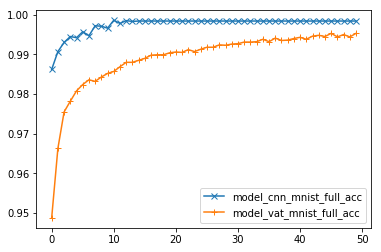

In [55]:
temp_trace=model_cnn_mnist_full_acc_trace[:]
while len(temp_trace)<len(model_vat_mnist_full_acc_trace):
    temp_trace.append(temp_trace[-1])
plt.plot(range(len(temp_trace)),temp_trace,"x-",label="model_cnn_mnist_full_acc")
plt.plot(range(len(model_vat_mnist_full_acc_trace)),model_vat_mnist_full_acc_trace,"+-",label="model_vat_mnist_full_acc")
plt.legend()
del temp_trace

From the figures we can see that if all data (60000 images) are labeled, CNN and VAT (or it should be called AT at this time) can reach similar accuracy. However, CNN has shorter training time. As a result, if all data are labeled and there is low noise in the dataset, there is no need to use VAT.

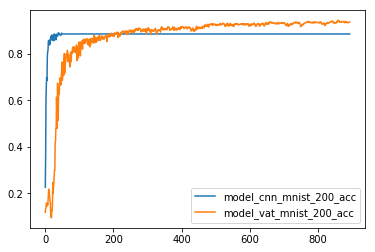

In [56]:
temp_trace=model_cnn_mnist_200_acc_trace[:]
while len(temp_trace)<len(model_vat_mnist_200_acc_trace):
    temp_trace.append(temp_trace[-1])
plt.plot(range(len(temp_trace)),temp_trace,"-",label="model_cnn_mnist_200_acc")
plt.plot(range(len(model_vat_mnist_200_acc_trace)),model_vat_mnist_200_acc_trace,"-",label="model_vat_mnist_200_acc")
plt.legend()
del temp_trace

From the figures we can see that if only 200 images are labeled, VAT reaches higher accuracy. The reason is that VAT use LDS to improve model robustness. Even if there are plenty of data are unlabeled, VAT can still use these data for training while CNN cannot use unlabeled data for training. 

## 5.2 Compare the accuracy of CNN and VAT in SVHN

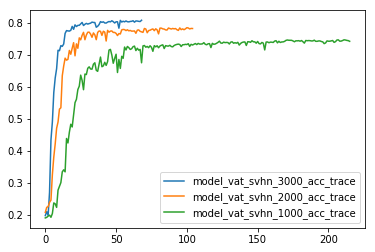

In [57]:
plt.plot(range(len(model_vat_svhn_3000_acc_trace)),model_vat_svhn_3000_acc_trace,"-",label="model_vat_svhn_3000_acc_trace")
plt.plot(range(len(model_vat_svhn_2000_acc_trace)),model_vat_svhn_2000_acc_trace,"-",label="model_vat_svhn_2000_acc_trace")
plt.plot(range(len(model_vat_svhn_1000_acc_trace)),model_vat_svhn_1000_acc_trace,"-",label="model_vat_svhn_1000_acc_trace")
plt.legend()

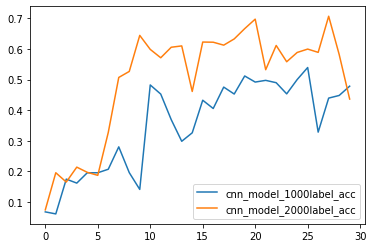

In [92]:
plt.plot(range(len(cnn_model_1000label_acc)),cnn_model_1000label_acc,"-",label="cnn_model_1000label_acc")
plt.plot(range(len(cnn_model_2000label_acc)),cnn_model_2000label_acc,"-",label="cnn_model_2000label_acc")
plt.legend()

From the figure we can see that when the number of labeled data decreases, the accuracy of CNN model falls faster than VAT-based model, which means CNN model has lower robustness. 

## 5.3 Analysis of the indistinguishable images

After we train our VAT-based model, we can analyze which images cannot be distinguished. We plot 12 images which are wrongly classified.

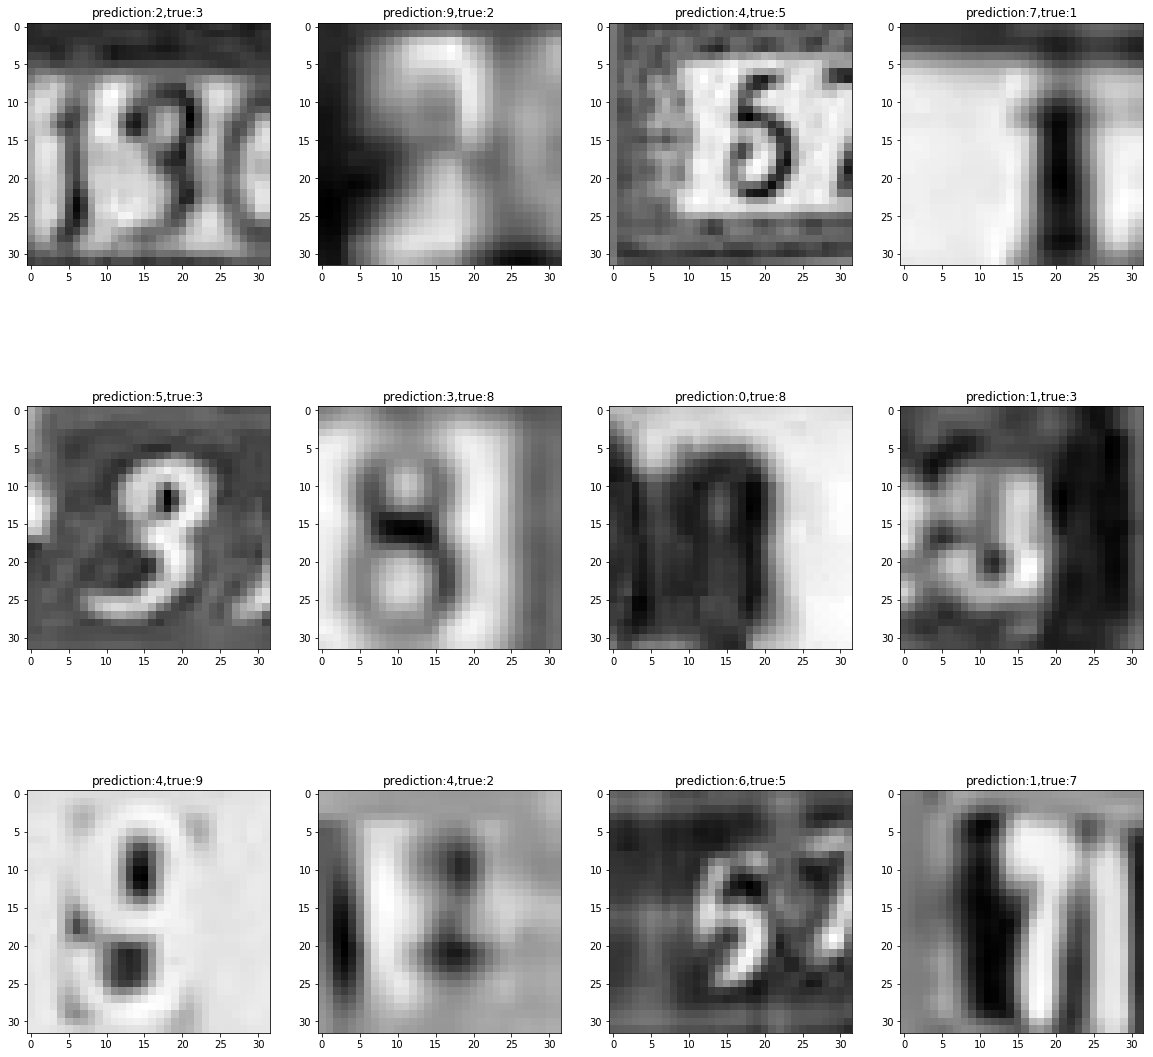

In [58]:
for i in range(12):
    plt.figure(0,figsize=(20,20))
    while True:
        rffwp=randint_for_finding_wrong_prediction=random.randint(0,len(test_greyscale)-1)
        pred=model_vat_svhn_3000.predict( [test_greyscale[rffwp].reshape(-1,1024),test_greyscale[rffwp].reshape(-1,1024),svhn_test_label_onehot_useless ]).argmax(-1)
        if svhn_test_label[rffwp]!=pred:
            plt.subplot(3,4,i+1)
            plt.imshow(test_greyscale[rffwp].reshape(32,32),cmap ='gray')
            plt.title(f'prediction:{pred[0][0]},true:{svhn_test_label[rffwp]}')
            break

Some images in the previous figure are really unclear, even human cannot distingguish them. However, there are still some images that fairly clear but are also wrongly classified. We think the reason may be the neighbor number (as noise) influence the classification.

# 6. CONCLUSIONS

From the above experiments of using CNN and VAT models on MNIST and SVHN dataset, we can draw a firm conclusion that VAT performs well in the situation of inadequate labeled data.

With 3000 labeled data samples, CNN can only reach 70~75% accuracy, while VAT could boost the accuracy to more than 82% if we add unlabeled data samples as input.

With 2000 labeled data samples, CNN can only reach 63% accuracy at most, while VAT could boost the accuracy to more than 78.5%.

With 1000 labeled data samples, the prediction using CNN model only reaches 54% accuracy in the best situation, while VAT could reach more than 69%.

We find that if choosing proper hyperparameters, VAT can perform better than CNN. We think the reasons are that VAT-based model can utilize unlabeled data for robustness improvement. If there are few data are labeled, CNN will easily reach the overfitting state.  

VAT has shown good results in semi-supervised learning, it performs better when there are very few training samples. In the real world application, VAT is especially good for the situation that data analysts have a few labeled data (or no labeled data) and great amount of unlabeled data samples. It can still make considerably accurate prediction. 

The most interesting part we learned from this project is how to improve robustness of a  model. For CNN, we can use dropout layers, which are used to control not training part of the neurons. For semi-supervised learning, we can use LDS, which utilize unlabeled data to decrease the influence of negative gradient perturbation.

LeakyReLU can be used to solve "dying ReLU" to some extent. However, LeakyReLU does not always help.  

The most difficult part is trying to improve the performance of our VAT-based model. Only after we compare our VAT-based model with the model from online resource, we find that our VAT-based model is fairly good. 

# 7. WORK DIVISION

* Zheyi Qin -- Implimentation of VAT, leaky ReLU   
* Zihui Li -- Implimentation of CNN   
* Both -- Collect reference materials and online resources; determine the topic; make plan; set methodology; write proposal and final report, etc.

# 8. REFERENCES

* [1] Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011.
* [2] T. Miyato, S. Maeda, M. Koyama and S. Ishii, "Virtual Adversarial Training: A Regularization Method for Supervised and Semi-Supervised Learning," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 41, no. 8, pp. 1979-1993, 1 Aug. 2019.
* [3] W. Pratt, Digital Image Processing, Wiley-Interscience, 2007.
* [4] Goodfellow, Ian J., et al. "Multi-digit number recognition from street view imagery using deep convolutional neural networks." arXiv preprint arXiv:1312.6082 (2013).
* [5] An Introduction to Virtual Adversarial Training. 
https://divamgupta.com/unsupervised-learning/semi-supervised-learning/2019/05/31/introduction-to-virtual-adversarial-training.html
* [6] A Practical Guide to ReLU.
https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

In [68]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Project_Report_Zheyi_Zihui.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Project_Report_Zheyi_Zihui.ipynb is 4131
